In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re

In [3]:
real_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')

In [4]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
real_data['target'] = 1
fake_data['target'] = 0 

In [9]:
fake_data.tail()

,title,text,subject,date,target
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [10]:
combine_data = pd.concat([real_data, fake_data], ignore_index=True, sort=False)
combine_data.tail()

,title,text,subject,date,target
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


Text(0.5, 1.0, 'Data distribution of fake and real data')

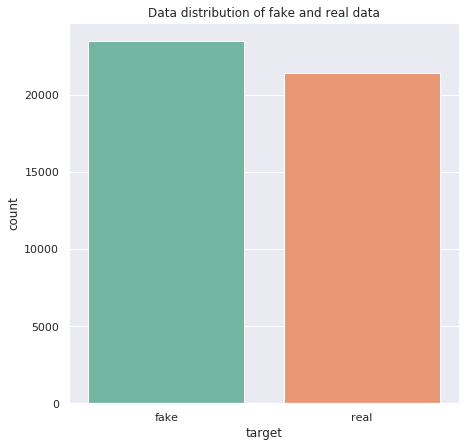

In [11]:
plt.figure(figsize=(7, 7))
sns.set(style="darkgrid")

color = sns.color_palette("Set2")
ax = sns.countplot(x="target", data=combine_data, palette=color)

ax.set(xticklabels=['fake', 'real'])

plt.title("Data distribution of fake and real data")

Text(0.5, 1.0, 'Data distribution of fake and real data')

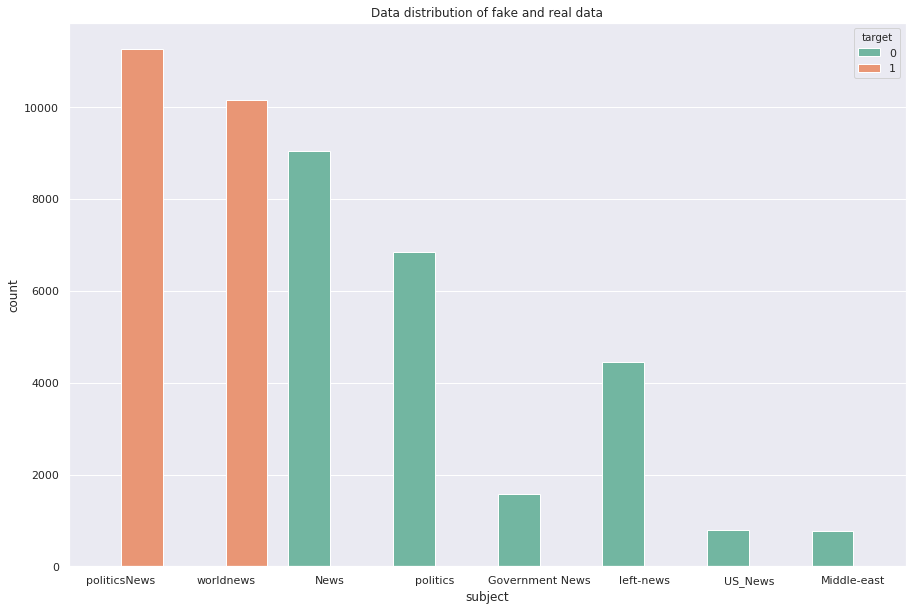

In [12]:
plt.figure(figsize=(15, 10))
sns.set(style="darkgrid")

color = sns.color_palette("Set2")
ax = sns.countplot(x="subject",  hue='target', data=combine_data, palette=color)

# ax.set(xticklabels=['fake', 'real'])

plt.title("Data distribution of fake and real data")

In [13]:
combine_data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

## Data Cleaning

In [13]:
import re

In [14]:
def clean_train_data(x):
    text = x
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) # remove square brackets
    text = re.sub(r'[^\w\s]','',text) # remove punctuation
    text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
    text = re.sub(r'http\S+', '', text)
    text = re.sub('\n', '', text)
    return text

In [15]:
clean_combine_data = combine_data.copy()
clean_combine_data['text'] = combine_data.text.apply(lambda x : clean_train_data(x))
clean_combine_data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters the head of a conservative...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,washington reuters transgender people will be...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters the special counsel invest...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geo...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuters president donald tr...,politicsNews,"December 29, 2017",1


In [16]:
clean_combine_data.tail()

,title,text,subject,date,target
44893,McPain: John McCain Furious That Iran Treated ...,century wire says as reported earlier this w...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,century wire says it s a familiar theme whene...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,patrick henningsen century wireremember when...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,century wire says al jazeera america will go ...,Middle-east,"January 14, 2016",0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,century wire says as predicted in its new ye...,Middle-east,"January 12, 2016",0


## Stopword Removal

In [19]:
eng_stopwords = nltk.corpus.stopwords.words("english")

In [20]:
def remove_eng_stopwords(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [word for word in token_text if word not in eng_stopwords]
    join_text = ' '.join(remove_stop)
    return join_text

In [21]:
stopword_combine_data = clean_combine_data.copy()
stopword_combine_data['text'] = clean_combine_data.text.apply(lambda x : remove_eng_stopwords(x))
stopword_combine_data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters head conservative republica...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,washington reuters transgender people allowed ...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters special counsel investigati...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geor...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuters president donald tru...,politicsNews,"December 29, 2017",1


## Find out common words

In [22]:
from itertools import chain
from collections import Counter

In [23]:
list_words = stopword_combine_data['text'].str.split()
list_words_merge = list(chain(*list_words))

d = Counter(list_words_merge)
df = pd.DataFrame(data=d, index=['count'])
top_common_words = df.T.sort_values(by=['count'], ascending=False).reset_index().head(50)
top_common_words.head()

,index,count
0,said,130051
1,trump,115869
2,us,63100
3,would,54929
4,president,51005


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

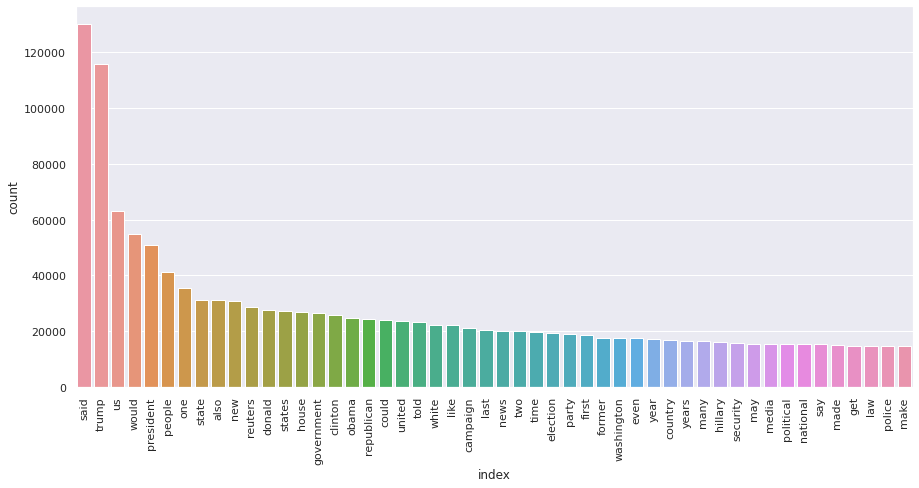

In [24]:
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.barplot(x="index", y='count', data=top_common_words)
plt.xticks(rotation=90)

## Lemmatization

In [25]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [26]:
lemm = WordNetLemmatizer()

In [27]:
def word_lemmatizer(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [lemm.lemmatize(w) for w in token_text]
    join_text = ' '.join(remove_stop)
    return join_text

In [28]:
lemmatize_data = stopword_combine_data.copy()
lemmatize_data['text'] = stopword_combine_data.text.apply(lambda x : word_lemmatizer(x))
lemmatize_data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters head conservative republica...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,washington reuters transgender people allowed ...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters special counsel investigati...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geor...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuters president donald tru...,politicsNews,"December 29, 2017",1


# N-Gram Analysis

---

<center><img style="width: 700px;" src="https://images.deepai.org/glossary-terms/867de904ba9b46869af29cead3194b6c/8ARA1.png"></center>

---
<i>Source: Image from Google</i>

In [29]:
string = ' '.join(lemmatize_data['text'])

In [30]:
str_val = string.split(" ")

## Unigram Analysis

In [31]:
data_unigram=(pd.Series(nltk.ngrams(str_val, 1)).value_counts())[:30]

In [32]:
data_unigram_df=pd.DataFrame(data_unigram)
data_unigram_df = data_unigram_df.reset_index()
data_unigram_df = data_unigram_df.rename(columns={"index": "key", 0: "value"})
data_unigram_df.head()

,key,value
0,"(said,)",130051
1,"(trump,)",127942
2,"(u,)",63394
3,"(state,)",58301
4,"(would,)",54929


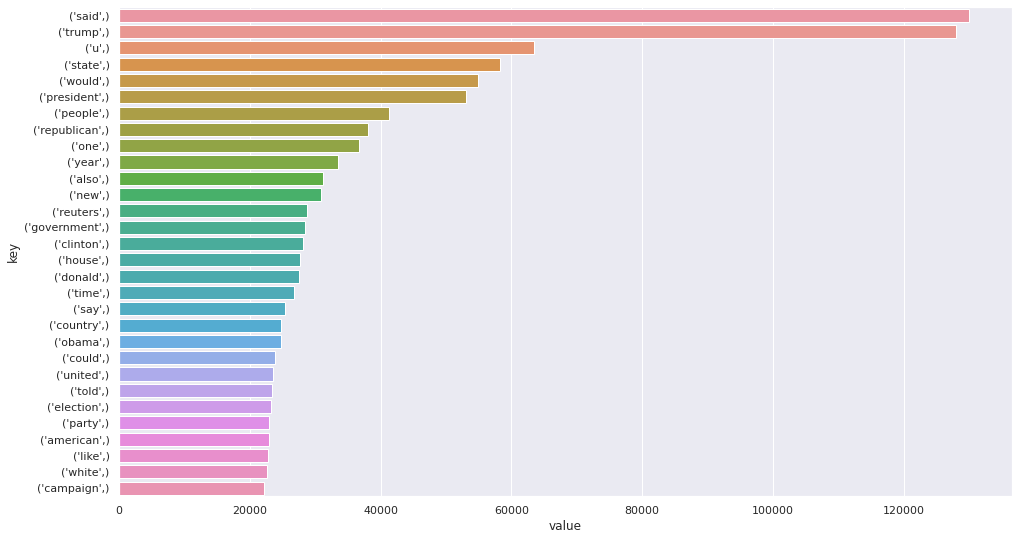

In [33]:
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_unigram_df)

## Bigram Analysis

In [34]:
data_bigram=(pd.Series(nltk.ngrams(str_val, 2)).value_counts())[:30]

In [35]:
data_bigram_df=pd.DataFrame(data_bigram)
data_bigram_df = data_bigram_df.reset_index()
data_bigram_df = data_bigram_df.rename(columns={"index": "key", 0: "value"})
data_bigram_df.head()

,key,value
0,"(donald, trump)",23216
1,"(united, state)",18368
2,"(white, house)",14672
3,"(hillary, clinton)",9177
4,"(new, york)",8624


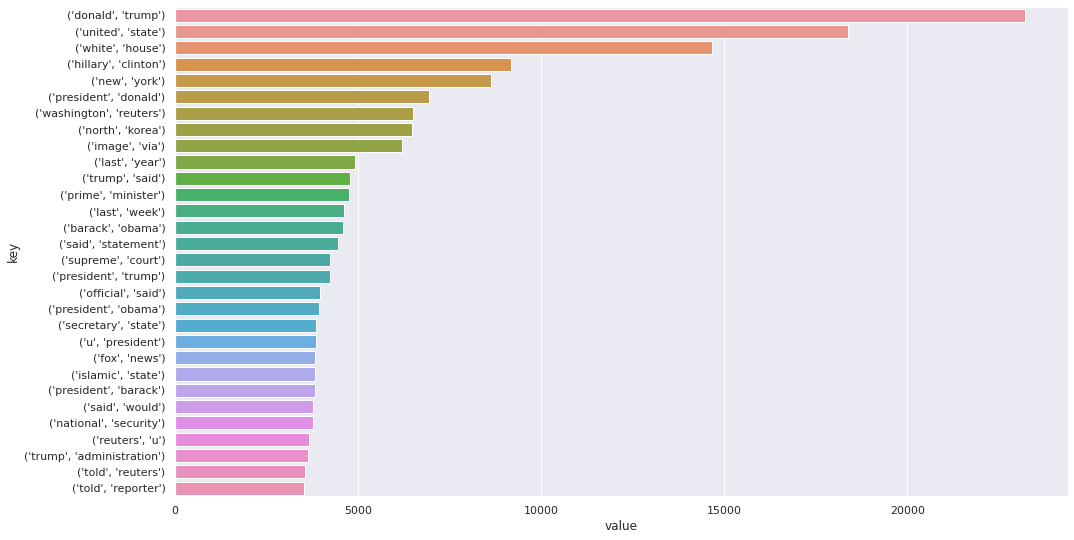

In [36]:
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_bigram_df)

## Trigram Analysis

In [37]:
data_trigram=(pd.Series(nltk.ngrams(str_val, 3)).value_counts())[:30]

In [38]:
data_trigram_df=pd.DataFrame(data_trigram)
data_trigram_df = data_trigram_df.reset_index()
data_trigram_df = data_trigram_df.rename(columns={"index": "key", 0: "value"})
data_trigram_df.head()

,key,value
0,"(president, donald, trump)",6732
1,"(president, barack, obama)",2854
2,"(u, president, donald)",2590
3,"(washington, reuters, u)",2358
4,"(donald, j, trump)",2146


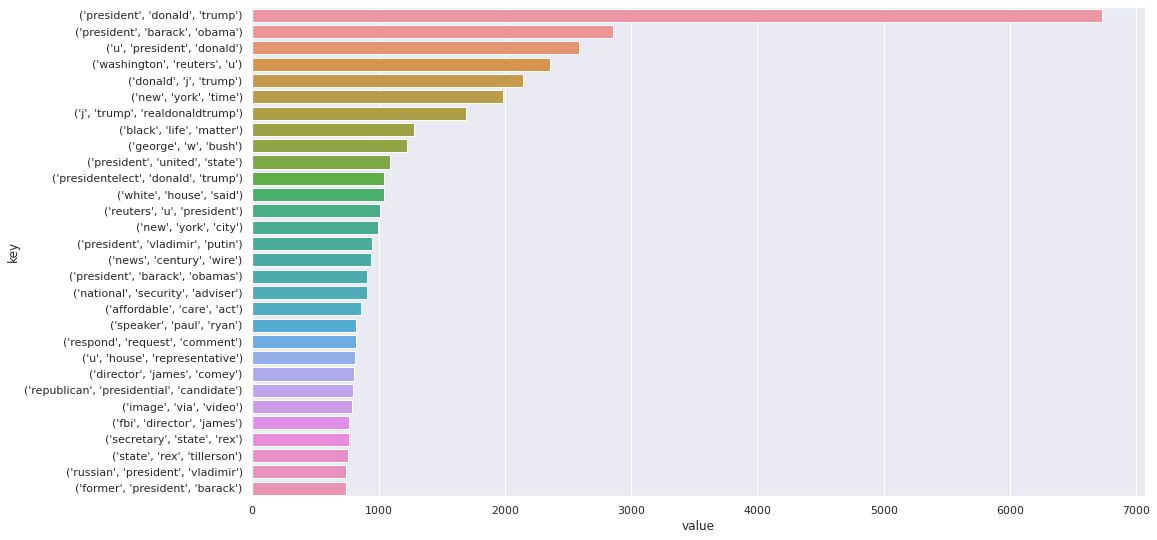

In [39]:
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_trigram_df)

#### Wow they incredibly use Donald Trump too many times. What u think is this ok?

# Modeling

In [40]:
model_data = stopword_combine_data.copy()

In [41]:
model_data['combine_text'] = model_data['subject'] + " " + model_data['title'] + " " + model_data['text']
del model_data['title']
del model_data['subject']
del model_data['date']
del model_data['text']
model_data.head()

,target,combine_text
0,1,"politicsNews As U.S. budget fight looms, Repub..."
1,1,politicsNews U.S. military to accept transgend...
2,1,politicsNews Senior U.S. Republican senator: '...
3,1,politicsNews FBI Russia probe helped by Austra...
4,1,politicsNews Trump wants Postal Service to cha...


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(model_data['combine_text'], model_data['target'], random_state=0)

# Bag of Words

---

<center><img style="width: 700px;" src="https://3.bp.blogspot.com/-4pxORQAgAFI/XMNZhEssXtI/AAAAAAAAGmA/SuQGsp-GyT4jKlUZieg_A5lnTza_GujfwCLcBGAs/s1600/bag_of_words.png"></center>

---
<i>Source: Image from Google</i>

## Vectorizing

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)

In [46]:
X_vec_test = vec_train.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [48]:
model = LogisticRegression()
model.fit(X_vec_train, y_train)

LogisticRegression()

In [49]:
predicted_value = model.predict(X_vec_test)

In [50]:
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.9985562606683752


### ohh you see this result it is 99.86 means this title is almost real. but actually is it? u might be found somethings wrong in model execution. ok lets do some in modeling to do more reliable. 

# Modeling -2

In [51]:
model_2_data = lemmatize_data.copy()
model_2_data['combine_text'] = model_2_data['title'] + " " + model_2_data['text']
del model_2_data['title']
del model_2_data['subject']
del model_2_data['date']
del model_2_data['text']
model_2_data.head()

,target,combine_text
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


In [52]:
X_train, X_test, y_train, y_test = train_test_split(model_2_data['combine_text'], model_2_data['target'], test_size=0.33, random_state=0)

In [53]:
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)

In [54]:
model = LogisticRegression()
model.fit(X_vec_train, y_train)
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
print(accuracy_value)

0.9966511018602802


### so our new predicted result is 99.66, not much difference from previous one. though im not doing much work in modeling. but i can assure you this dataset always given u above 90% accuracy.

### why this is. is it really easy to find out which news are fake and which are real. i don't know. but i want to show u something about this dataset. 

### I'm much inspired from this notebook. You can check also. Im getting some idea from this notebook to knowing you about this dataset.
[https://www.kaggle.com/josutk/only-one-word-99-2](https://www.kaggle.com/josutk/only-one-word-99-2)

<h2 style="font-size: 30px;color: #ae2e28;">Part - 2</h2>

# Deep drive in this Dataset

## Fact-1: Subject Distribution

In [56]:
ex_combine_data = combine_data.copy()
ex_combine_data = ex_combine_data.replace(["politicsNews"], 'politics')
ex_combine_data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politics,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politics,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politics,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politics,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politics,"December 29, 2017",1


Text(0.5, 1.0, 'Data distribution of fake and real data')

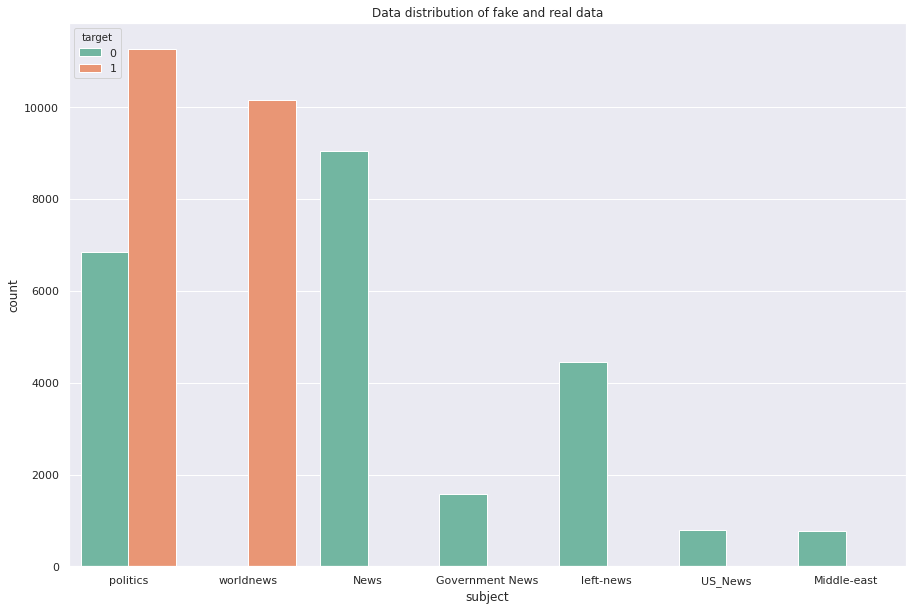

In [57]:
plt.figure(figsize=(15, 10))
sns.set(style="darkgrid")

color = sns.color_palette("Set2")
ax = sns.countplot(x="subject",  hue='target', data=ex_combine_data, palette=color)

# ax.set(xticklabels=['fake', 'real'])

plt.title("Data distribution of fake and real data")

#### Subjects are not well distributed The real data contains only two subjects and the fake data contains the remaining subjects. Only Politics are common.

#### So the question is, does this description follow their titles? Otherwise we can say that any news we get about the US or the Middle East is completely fake. Does it make sense?

## Fact-2: Text Length

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0.98, 'Average word length in each text')

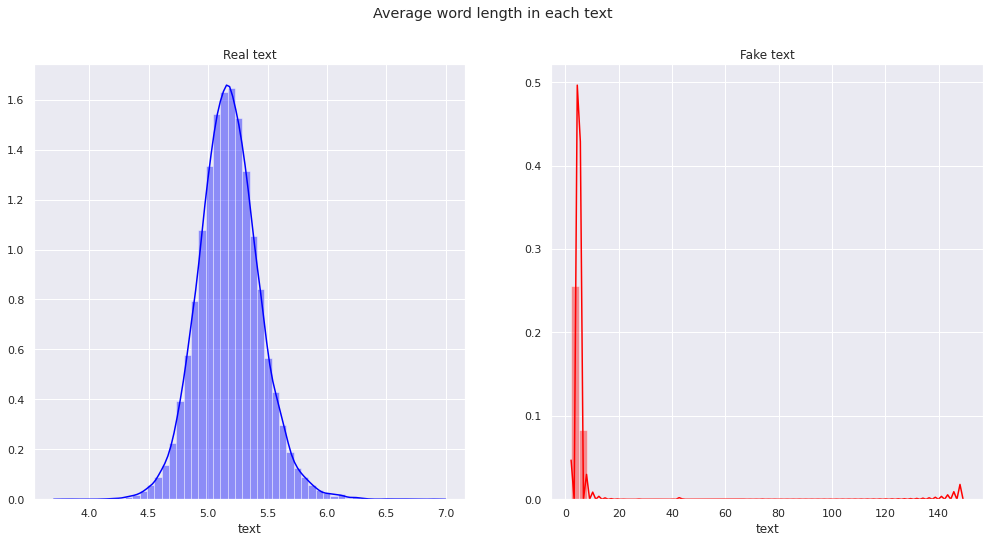

In [58]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(17,8))

word = ex_combine_data[ex_combine_data['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('Real text')

word = ex_combine_data[ex_combine_data['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Fake text')

fig.suptitle('Average word length in each text')

#### Average text length are not same for both. And the difference are really remarkable. Yes length can not be same but this difference is huge. Maybe it can be hamper some training model.

## Fact-3: Unique Words

In [59]:
all_words_after = real_data['text'].str.split()
merged = list(chain(*all_words_after))
d = Counter(merged)
df = pd.DataFrame(data=d, index=['count'])
top_count_words = df.T.sort_values(by=['count'], ascending=False).reset_index().head(50)
top_count_words.head()

,index,count
0,the,422622
1,to,243787
2,of,204339
3,a,187214
4,and,179411


In [60]:
from collections import Counter
results = Counter()
real_data['text'].str.lower().str.split().apply(results.update)
real_unq_count = len(results)
print(real_unq_count)

163084


In [61]:
results = Counter()
fake_data['text'].str.lower().str.split().apply(results.update)
fake_unq_count = len(results)
print(fake_unq_count)

267271


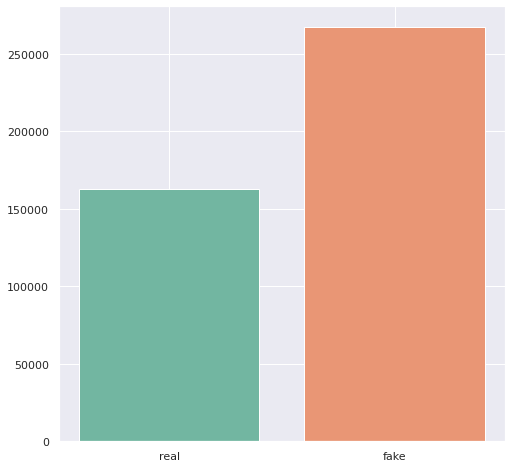

In [62]:
plt.figure(figsize=(8,8))
plt.bar([1, 2], [real_unq_count, fake_unq_count], color=['#72b6a1', '#e99675'])
plt.xticks([1,2], ('real', 'fake'))
plt.show()

#### Earlier we saw that the average text length of fake information is not very long, but in unique words it appears higher than the real data. That's mean, the ratio of same words is too much. What Do you think is this okay for prediction?

## So What is yours finding, is this title real or fake?